In [4]:
# Importing packages

import pandas as pd
import numpy as np

import pandas_datareader
import datetime

from pandas_datareader import wb

# Remember to install pip wbdata pip install pandas-datareader

In [5]:

# Cleaning data: choosing data, indicators

countries = ["WLD", "EGY", "PRT", "ARG", "SWE", "SEN", "JPN", "FRA"]

indicators = {"NY.GDP.PCAP.KD":"GDP per capita", "SP.DYN.TFRT.IN":"Fertility Rate",  
              "SP.DYN.LE00.IN":"Life expectancy at birth", "SP.DYN.IMRT.IN":"Mortality rate, infant"}

As we are interested in how the economic growth through the years(1970-2016) have affected the livingstandards for the chosen countries, we have chosen these indicators: GDP per Capita, Fertility Rate, Life expectancy at birth and Mortality rate, Infant. 

In [6]:
data_wb = wb.download(indicator= indicators, country= countries, start=1960, end=2016)
data_wb = data_wb.rename(columns = {"NY.GDP.PCAP.KD":"gdp_capita", "SP.DYN.TFRT.IN":"fert",  
                                    "SP.DYN.LE00.IN":"expec", "SP.DYN.IMRT.IN":"mort"})
data_wb = data_wb.reset_index()
round(data_wb.head(-1), 2)

C:\Programmering\lib\site-packages\pandas_datareader\wb.py:134: UserWarning: Non-standard ISO country codes: WLD
  'country codes: %s' % tmp, UserWarning)


,country,year,gdp_capita,fert,expec,mort
0,Argentina,2016,10206.25,2.29,76.58,9.7
1,Argentina,2015,10498.59,2.31,76.42,10.2
2,Argentina,2014,10323.21,2.32,76.25,10.7
3,Argentina,2013,10699.20,2.34,76.09,11.3
4,Argentina,2012,10557.89,2.35,75.93,11.9
5,Argentina,2011,10780.02,2.36,75.76,12.5
6,Argentina,2010,10276.26,2.37,75.60,13.0
7,Argentina,2009,9428.50,2.38,75.43,13.4
8,Argentina,2008,10125.13,2.40,75.27,13.7
9,Argentina,2007,9830.68,2.41,75.10,14.0


In [7]:
# Cleaning data: clearing missing data.

print(f"Original: {data_wb.shape[0]} observations, {data_wb.shape[1]} variables")
del data_wb["mort"]
print(f"Cleared: {data_wb.shape[0]} observations, {data_wb.shape[1]} variables")

Original: 456 observations, 6 variables
Cleared: 456 observations, 5 variables


In [8]:
# Plotting: Useful packages for this project
import matplotlib.pyplot as plt
%matplotlib inline 
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets

In [9]:
# Defining data
country=data_wb["country"]
year=data_wb["year"]
gdp_capita=data_wb["gdp_capita"]
fert = data_wb["fert"]
expec = data_wb["expec"]

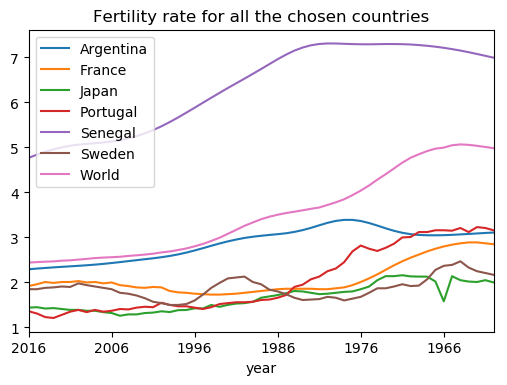

In [25]:
# Figure 1: Plotting fertility rate for all the chosen countries

fert_dev = data_wb[data_wb["country"].isin(['Argentina', 'Senegal', 'Japan', 'France', 'World', "Sweden",
                                              "Egypt, Arab rep.", "Portugal"])]

def plot(fig):
    
    fig_fert_dev = fig.set_index('year')
    fig_fert_dev.groupby(['country'])['fert'].plot(legend=True);


fig = plt.figure(dpi=100)
plt.xticks(np.arange(0, 56, 10))
plt.title('Fertility rate for all the chosen countries')
plt.gca().invert_xaxis()
plot(fert_dev)

Here we can see that overall the fertility rate has decreased in the time period (1960-2016), but it is clear that for the more developed countries have a lower fertility rate. We can see that Senegal has a fertility rate that approx 3.6 higher than Portugal.

In [23]:
# Plotting interactive figure 2: GDP per capita and the fertility rate (1960-2016)
def interactive_figure(country, data_wb):
    
    data_country = data_wb[data_wb.country == country]
    year = data_country.year
    gdp_capita = data_country.gdp_capita
    fert = data_country.fert
    
    fig = plt.figure(dpi=100)
    ax1 = fig.add_subplot(1,1,1)
    plt.title('GDP per capita and the fertility rate (1960-2016)')
    ax1.set_xlabel('Year')
    ax1.plot(year, gdp_capita, 'b')
    ax1.set_ylabel("GDP per Capita", color='b')
    
    ax2 = ax1.twinx()
    ax2.plot(year, fert, 'r')
    ax2.set_ylabel("Fertility rate", color='r')
    
    plt.xticks(np.arange(0, 56, 10))
    plt.gca().invert_xaxis()

widgets.interact(interactive_figure,
    year = widgets.fixed(year),
    data_wb = widgets.fixed(data_wb),
    country=widgets.Dropdown(description="Country", options=data_wb.country.unique()),
    gdp_capita=widgets.fixed(gdp_capita), fert = widgets.fixed(fert)
    
);

interactive(children=(Dropdown(description='Country', options=('Argentina', 'Egypt, Arab Rep.', 'France', 'Jap…

In [20]:
# Plotting interactive figure 3: GDP per capita and the life expectancy at birth (1960-2016)
def interactive_figure(country, data_wb):
    
    data_country = data_wb[data_wb.country == country]
    year = data_country.year
    gdp_capita = data_country.gdp_capita
    expec = data_country.expec
    
    fig = plt.figure(dpi=100)
    ax1 = fig.add_subplot(1,1,1)
    plt.title('GDP per capita and the life expectancy at birth (1960-2016)')
    ax1.set_xlabel('Year')
    ax1.plot(year, gdp_capita, 'b')
    ax1.set_ylabel("GDP per Capita", color='b')
    
    ax2 = ax1.twinx()
    ax2.plot(year, expec, 'g')
    ax2.set_ylabel("Life expectancy at birth", color='g')
    
    plt.xticks(np.arange(0, 56, 10))
    plt.gca().invert_xaxis()


widgets.interact(interactive_figure,
    year = widgets.fixed(year),
    data_wb = widgets.fixed(data_wb),
    country=widgets.Dropdown(description="Country", options=data_wb.country.unique()),
    gdp_capita=widgets.fixed(gdp_capita), expec = widgets.fixed(expec)
    
);




interactive(children=(Dropdown(description='Country', options=('Argentina', 'Egypt, Arab Rep.', 'France', 'Jap…

Here we can see that there is a positive correlation between the development of the life expectancy at birth and GDP per Capita in the time period (1960-1970). Although for Senegal there is an interesting development as life expectancy at birht rises over the whole period while GDP per capita is falling from 1960-1995.

# Conclusion

From the data presented in this analysis, we found tell that there seem to be a negative correlation between how wealthy a country is and the population growth as expected. As this was a short analysis, and the main objective was to present the data in a nice and easy way, there is a lot of aspects, there remain to be uncovered and a further analysis should include more data on economic growth and perhaps an econometric approach.